<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/AplicacionMSE_GRAFICAS_5_Sep_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X:
 [[1.09762701]
 [1.43037873]
 [1.20552675]
 [1.08976637]
 [0.8473096 ]
 [1.29178823]
 [0.87517442]
 [1.783546  ]
 [1.92732552]
 [0.76688304]
 [1.58345008]
 [1.05778984]
 [1.13608912]
 [1.85119328]
 [0.14207212]
 [0.1742586 ]
 [0.04043679]
 [1.66523969]]
*****************
y:
 [[ 7.73674426]
 [ 8.62481053]
 [ 9.11065933]
 [ 7.06414083]
 [ 6.8549965 ]
 [ 7.02126894]
 [ 4.07253345]
 [10.0042566 ]
 [10.64641276]
 [ 5.55848409]
 [11.02010485]
 [ 5.71900384]
 [ 7.45402588]
 [ 9.36639598]
 [ 5.95899556]
 [ 5.99213457]
 [ 4.27625781]
 [ 9.37388159]]
*****************
y_pred:
: [[ 7.32242836]
 [ 8.48400315]
 [ 7.69908643]
 [ 7.29498831]
 [ 6.44861653]
 [ 8.0002093 ]
 [ 6.54588748]
 [ 9.71684484]
 [10.21875258]
 [ 6.16786226]
 [ 9.01834694]
 [ 7.18336416]
 [ 7.45669249]
 [ 9.95298898]
 [ 3.98676277]
 [ 4.09911983]
 [ 3.63197263]
 [ 9.30385937]]
************************
iterations 1: losses=61.07591245075748, ms=1.4894022277591201, bs=1.4894022277591201
iterations 2: losses=21.417260744308265, 

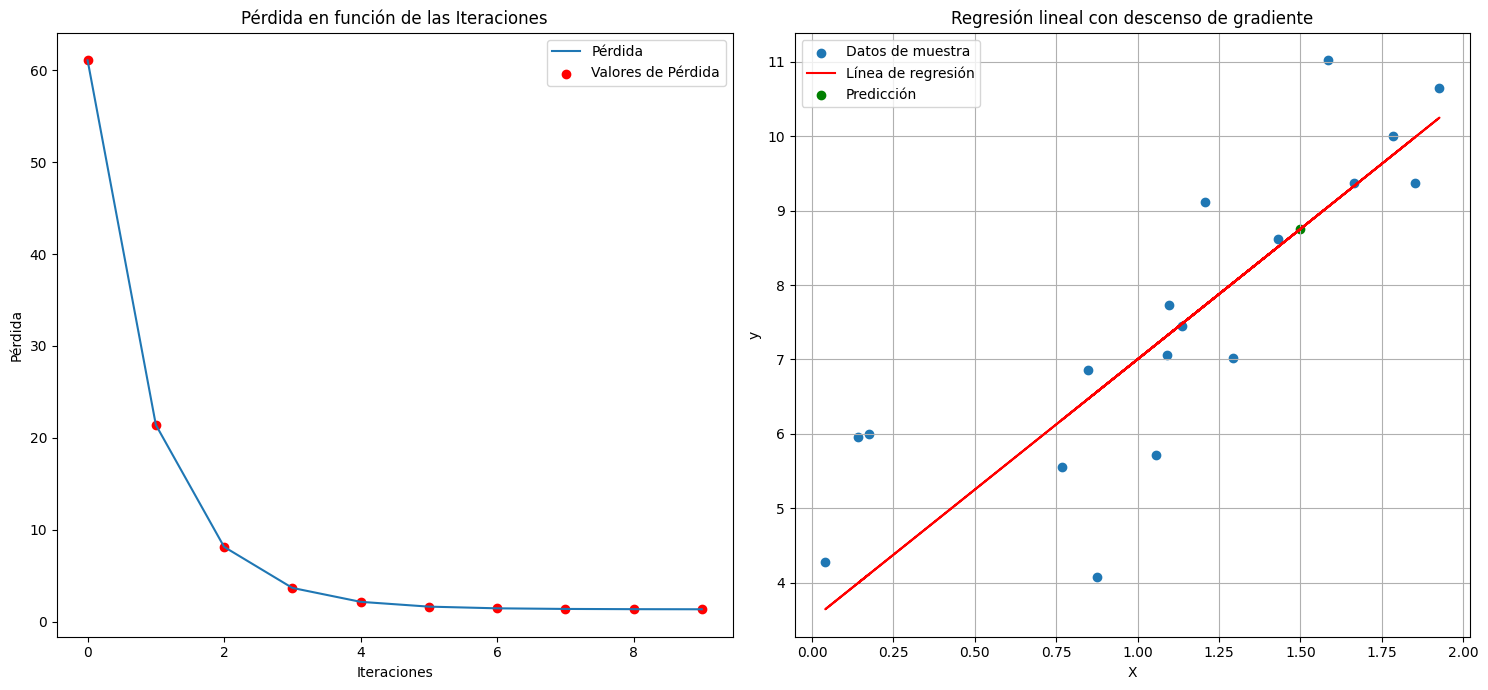

Parámetro m: 3.5012637301809098
Parámetro b: 3.5012637301809098


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de muestra sintéticos
np.random.seed(0)
X = 2 * np.random.rand(18, 1)
y = 4 + 3 * X + np.random.randn(18, 1)
print("X:\n",X)
print("*****************")
print("y:\n",y)
print("*****************")
# Inicializar parámetros m y b
m = 0
b = 0

# Hiperparámetros del descenso de gradiente
learning_rate = 0.8
iterations = 10

# Listas para guardar los valores de pérdida y parámetros en cada iteración
losses = []
ms = []
bs = []

# Descenso de gradiente tipo Batch
for i in range(iterations):
    # Calcular las predicciones del modelo
    y_pred = m * X + b

    # Cálcular el gradiente de la función de costo (MSE)
    gradient_m = (2/iterations) * np.mean((y_pred - y) * X)
    gradient_b = (2/iterations) * np.mean((y_pred - y) * X)

    # Actualizar los parámetros m y b
    m = m - learning_rate * gradient_m
    b = b - learning_rate * gradient_b

    # Calcular y almacenar la pérdida en esta iteración
    loss = np.mean((y_pred - y) ** 2)
    losses.append(loss)
    ms.append(m)
    bs.append(b)

print("y_pred:\n:",y_pred)
print("************************")
#---------------------------------------------------------
# Asumiendo que las tres listas tienen la misma longitud
for i in range(len(losses)):
    print(f"iterations {i + 1}: losses={losses[i]}, ms={ms[i]}, bs={bs[i]}")
# Hacer predicciones en nuevos datos
new_x = np.array([[1.5]])  # Nuevo valor de x
new_y = m * new_x + b

# Graficar la pérdida en función de las iteraciones
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(iterations), losses, label='Pérdida')
plt.scatter(range(iterations), losses, c='red', marker='o', label='Valores de Pérdida')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.title('Pérdida en función de las Iteraciones')
plt.legend()

# Graficar los datos y la línea de regresión
plt.subplot(1, 2, 2)
plt.scatter(X, y, label='Datos de muestra')
plt.plot(X, m * X + b, color='red', label='Línea de regresión')
plt.scatter(new_x, new_y, color='green', marker='o', label='Predicción')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión lineal con descenso de gradiente')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Imprimir los parámetros finales del modelo
print(f"Parámetro m: {m}")
print(f"Parámetro b: {b}")


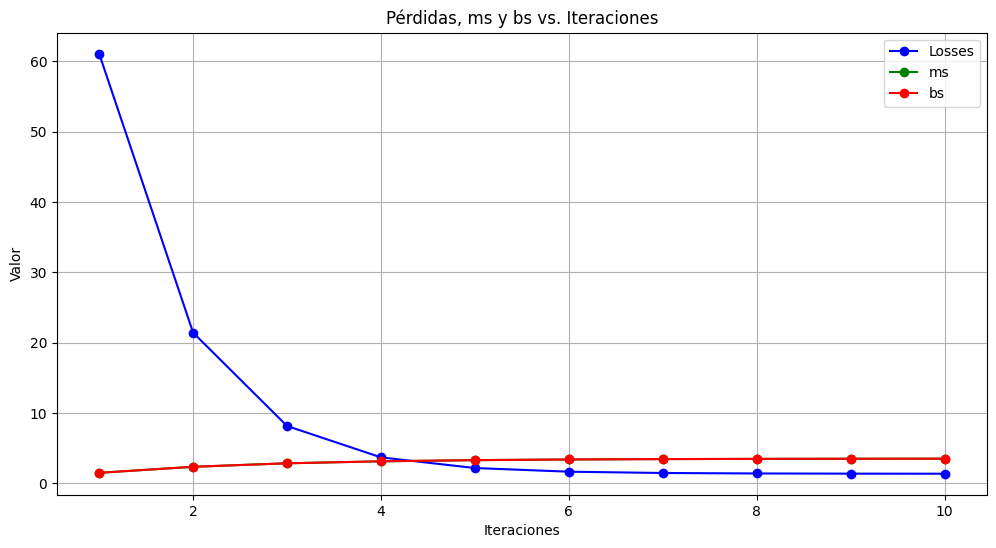

In [7]:
import matplotlib.pyplot as plt

# Datos
iterations = list(range(1, 11))
losses = [61.07591245075748, 21.417260744308265, 8.147936971878853, 3.6848584006316574, 2.1703809251740815, 1.6488732881074224, 1.465009635113767, 1.3978050822177308, 1.3719479855197394, 1.3613222446409428]
ms = [1.4894022277591201, 2.347789390983349, 2.8425036516815716, 3.1276223140097703, 3.291944748323848, 3.38664869438762, 3.4412294181791574, 3.472685925890062, 3.4908152544996547, 3.5012637301809098]
bs = [1.4894022277591201, 2.347789390983349, 2.8425036516815716, 3.1276223140097703, 3.291944748323848, 3.38664869438762, 3.4412294181791574, 3.472685925890062, 3.4908152544996547, 3.5012637301809098]

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(iterations, losses, marker='o', linestyle='-', color='b', label='Losses')
plt.plot(iterations, ms, marker='o', linestyle='-', color='g', label='ms')
plt.plot(iterations, bs, marker='o', linestyle='-', color='r', label='bs')

# Configurar el gráfico
plt.title('Pérdidas, ms y bs vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()


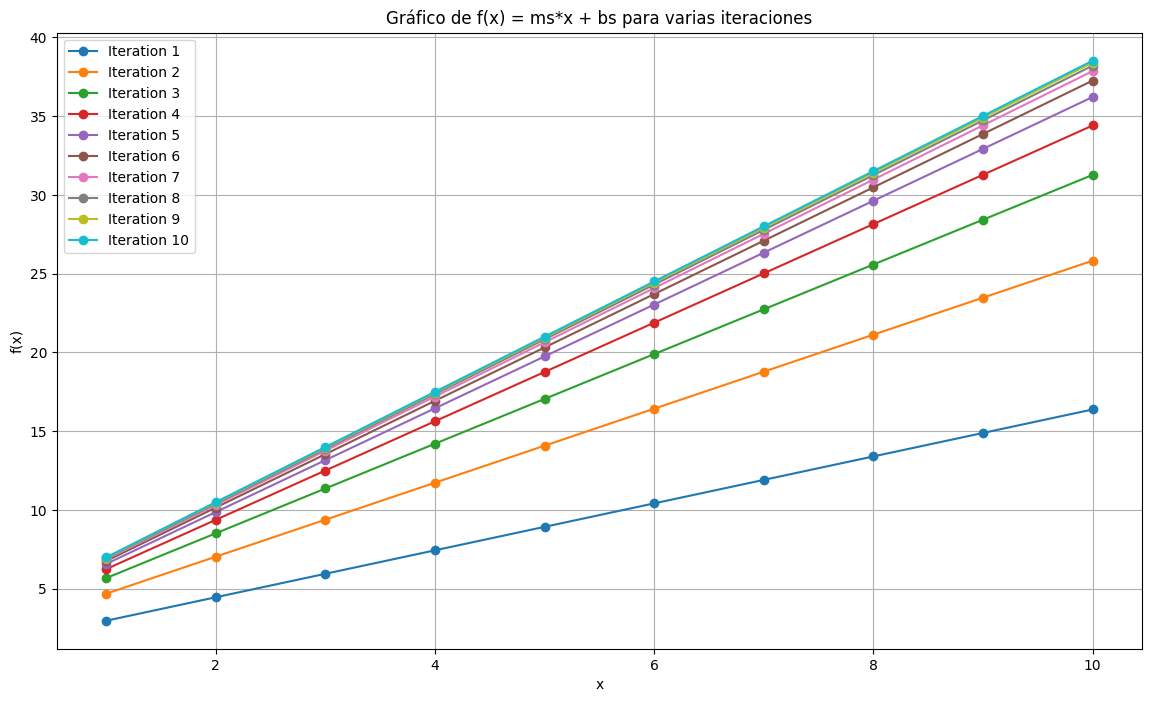

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de las iteraciones
data = [
    {"iteration": 1, "losses": 61.07591245075748, "ms": 1.4894022277591201, "bs": 1.4894022277591201},
    {"iteration": 2, "losses": 21.417260744308265, "ms": 2.347789390983349, "bs": 2.347789390983349},
    {"iteration": 3, "losses": 8.147936971878853, "ms": 2.8425036516815716, "bs": 2.8425036516815716},
    {"iteration": 4, "losses": 3.6848584006316574, "ms": 3.1276223140097703, "bs": 3.1276223140097703},
    {"iteration": 5, "losses": 2.1703809251740815, "ms": 3.291944748323848, "bs": 3.291944748323848},
    {"iteration": 6, "losses": 1.6488732881074224, "ms": 3.38664869438762, "bs": 3.38664869438762},
    {"iteration": 7, "losses": 1.465009635113767, "ms": 3.4412294181791574, "bs": 3.4412294181791574},
    {"iteration": 8, "losses": 1.3978050822177308, "ms": 3.472685925890062, "bs": 3.472685925890062},
    {"iteration": 9, "losses": 1.3719479855197394, "ms": 3.4908152544996547, "bs": 3.4908152544996547},
    {"iteration": 10, "losses": 1.3613222446409428, "ms": 3.5012637301809098, "bs": 3.5012637301809098},
]

# Extraer valores de ms y bs
ms_values = [item["ms"] for item in data]
bs_values = [item["bs"] for item in data]

# Generar datos de x
x = np.arange(1, 11)  # Iteraciones del 1 al 10

# Calcular f(x) para cada iteración
fx_values = [ms * x + bs for ms, bs in zip(ms_values, bs_values)]

# Crear el gráfico
plt.figure(figsize=(14, 8))

for iteration, fx in zip(x, fx_values):
    plt.plot(x, fx, marker='o', label=f'Iteration {iteration}')

# Configurar el gráfico
plt.title('Gráfico de f(x) = ms*x + bs para varias iteraciones')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()
